# cubic_spline_normal forward rate

In [1]:
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

dff = pd.read_excel('sw結果.xlsx',sheet_name='日期')



lable = dff.columns



df = pd.read_excel('台灣公債資料.xlsx',sheet_name='1-10')
df = pd.DataFrame(df)
name = df.columns


In [2]:
name[45]

datetime.datetime(2002, 11, 29, 0, 0)

In [3]:
df[name[0]]

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
Name: Maturity, dtype: int64

In [6]:
x = [1,2,3,4,5,6,7,8,9,10,50,60] #for T = 60 case

#x = [1,2,3,4,5,6,7,8,9,10,30,40] # For T=40 Case
xnew = np.linspace(1, 60, num= 60, endpoint=True)
result = []
for i in range(1,244,1):
    r = 0.038
    y = df[name[i]].tolist()
    y.append(r-0.0001) #UFR-10bp
    y.append(r) # UFR
    f2 = interp1d(x, y, kind='cubic')
    result.append(f2(xnew))

result_array = np.array(result).reshape(243,60)
df2 = pd.DataFrame(result_array)
df2.to_csv('cubic_spline_normal_forward_3.8_60.csv')

In [7]:

dff = pd.read_excel('sw結果.xlsx',sheet_name='日期')
lable = dff.columns


os.chdir("C:\\Users\\Chun-He\\Desktop\\IFRS 9 and 17\\其他國家外插方法")


df6 = pd.read_csv('cubic_spline_normal_4.4_60_nodot_T.csv')
df6.set_index('Unnamed: 0',inplace=True)
name = df6.columns
len(df6)

60

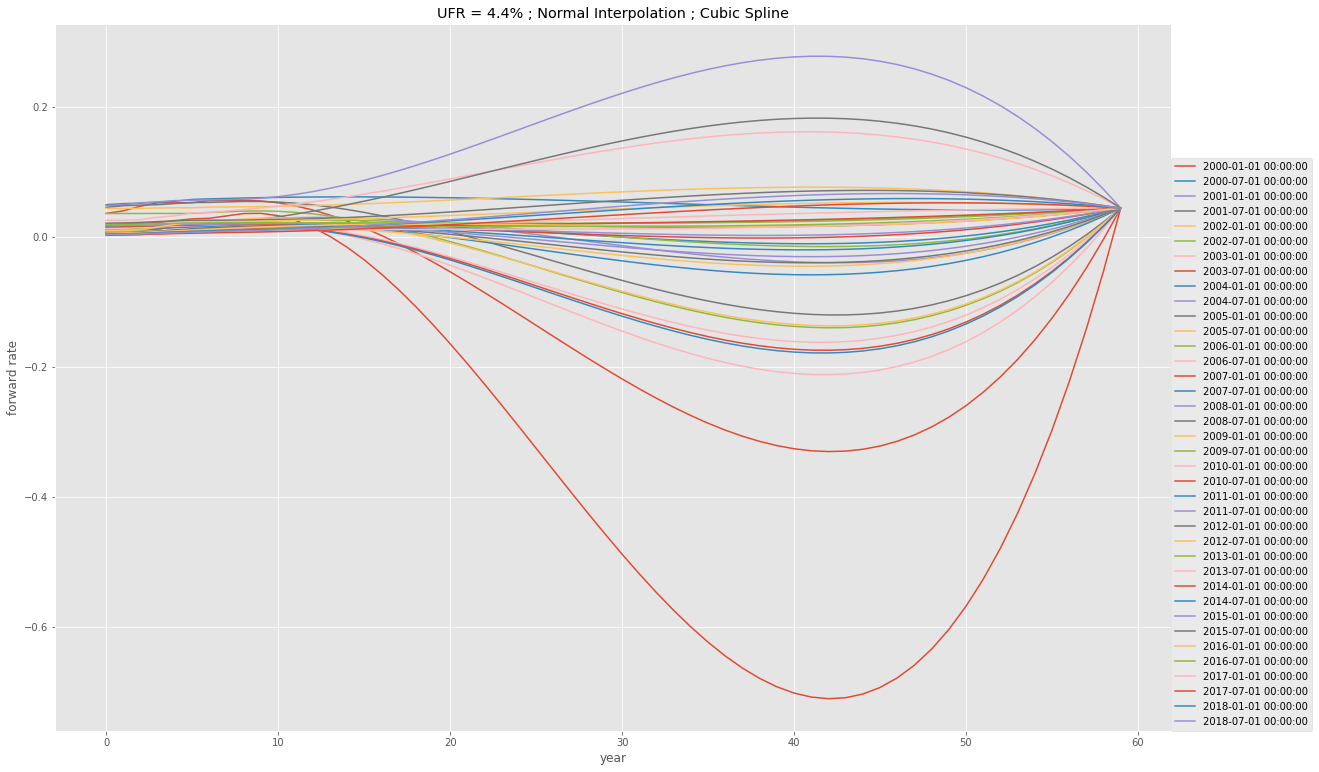

In [8]:
data = []

for i in range(0,225,6):
    plt.style.use('ggplot')
    plt.figure(num = 3,figsize= (20,13))
    plt.title('UFR = 4.4% ; Normal Interpolation ; Cubic Spline')
    plt.xlabel('year')
    plt.ylabel('forward rate')
    data = df6[name[i]].values
    plt.plot(data,label = lable[i])
    plt.legend(bbox_to_anchor=(1, 0),loc = 3,borderaxespad=0)
    

# cubic_spline_1510 forward rate

In [15]:
df3 = pd.read_excel('台灣公債資料.xlsx',sheet_name='1,5,10')
#df = df[:60]
df3 = pd.DataFrame(df3)

name = df3.columns
x = [1,5,10,50,60]
#x = [1,5,10,30,40]
xnew = np.linspace(1, 60, num=60, endpoint=True)
result2 = []
for i in range(1,244,1):
    y = df3[name[i]].tolist()
    y.append(0.0379)
    y.append(0.038)
    f2 = interp1d(x, y, kind='cubic')
    result2.append(f2(xnew))
    
result2_array = np.array(result2).reshape(243,60)
df4 = pd.DataFrame(result2_array)
df4.to_csv('cubic_spline_1510_forward_3.8_60.csv')


IndexError: index 60 is out of bounds for axis 0 with size 60

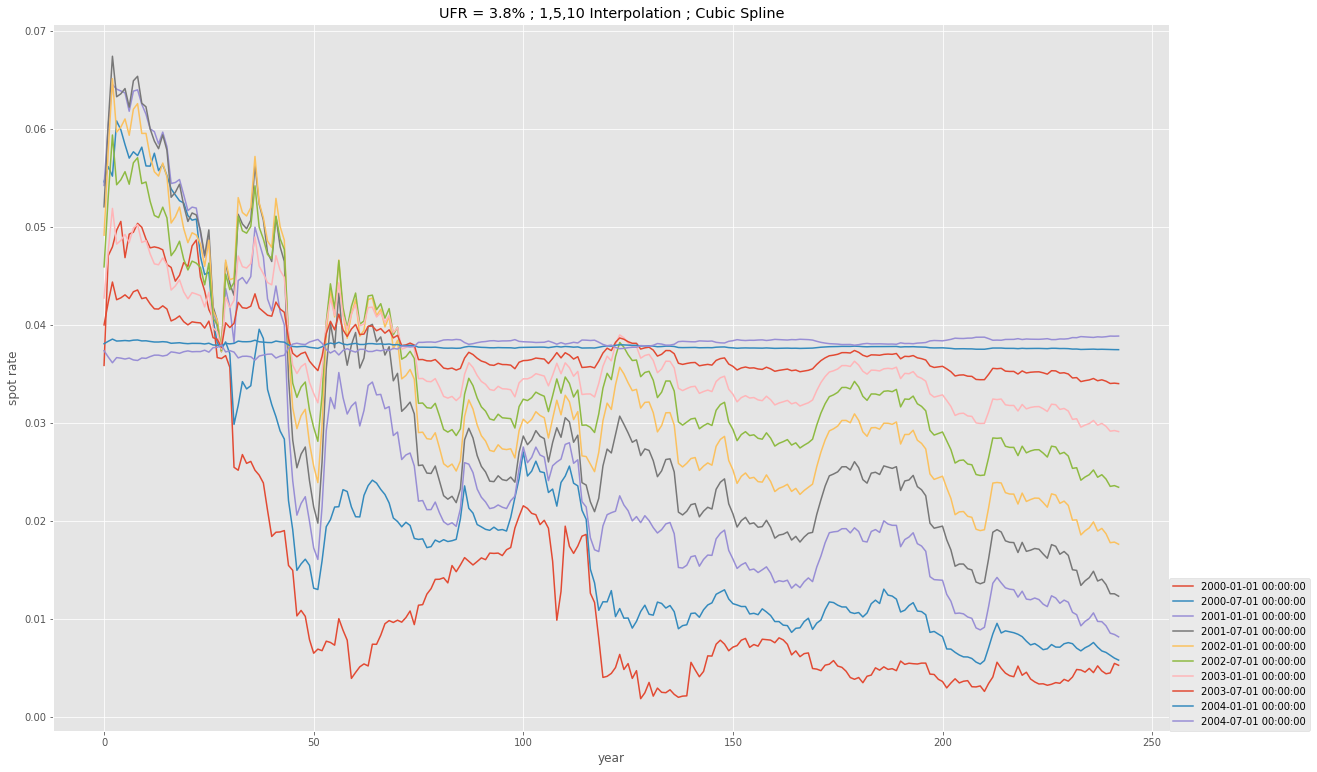

In [16]:
df7 = pd.read_csv('cubic_spline_1510_forward_3.8_60.csv')
df7.set_index('Unnamed: 0',inplace=True)
name = df7.columns

data = []

for i in range(0,225,6):
    plt.style.use('ggplot')
    plt.figure(num = 3,figsize= (20,13))
    plt.title('UFR = 3.8% ; 1,5,10 Interpolation ; Cubic Spline')
    plt.xlabel('year')
    plt.ylabel('spot rate')
    data = df7[name[i]].values
    plt.plot(data,label = lable[i])
    plt.legend(bbox_to_anchor=(1, 0),loc = 3,borderaxespad=0)